In [1]:
import numpy as np 
import pandas as pd 

In [2]:
dataset = pd.read_csv('Breast Cancer Detection Classification.csv')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[75  0]
 [ 1 38]]


0.9912280701754386

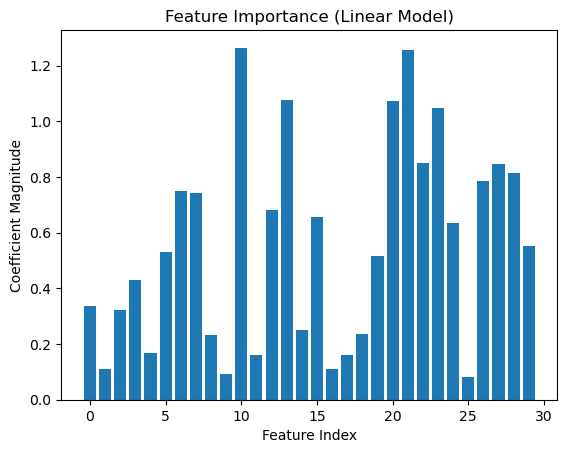

In [8]:
import matplotlib.pyplot as plt

importance = np.abs(classifier.coef_[0])

# Plot Feature Importances
plt.bar(range(len(importance)), importance)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance (Linear Model)")
plt.show()

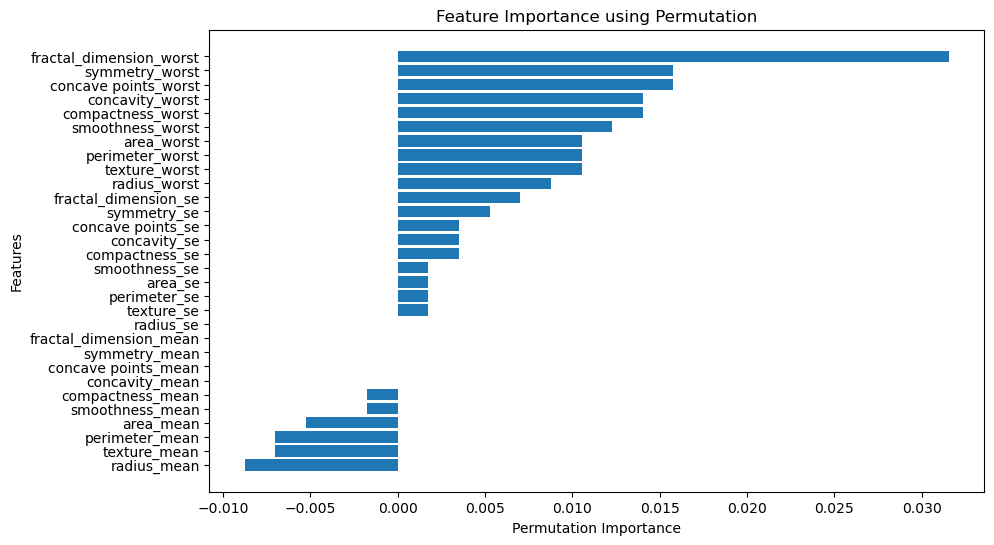

In [17]:
from sklearn.inspection import permutation_importance

feature_names = dataset.drop(columns=["id", "diagnosis"]).columns

perm_importance = permutation_importance(classifier, X_test, y_test, scoring="accuracy")

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance using Permutation")
plt.show()

In [ ]:
import shap

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
importance = np.abs(classifier.coef_[0])

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance using Logistic Regression")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1000x600 with 0 Axes>

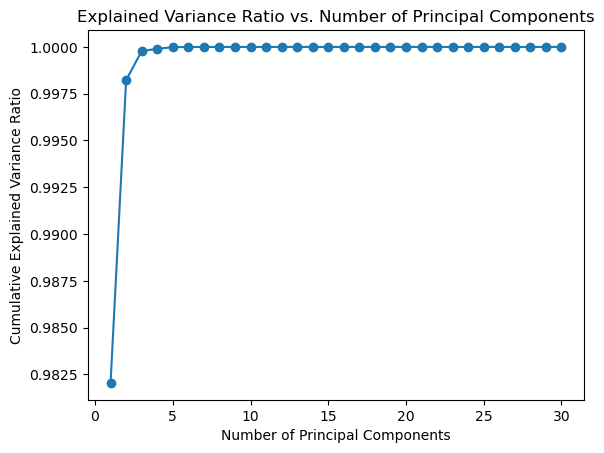

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [23]:
from sklearn.feature_selection import VarianceThreshold

threshold = VarianceThreshold(threshold=0.2)
threshold.fit(X_train)
threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [28]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

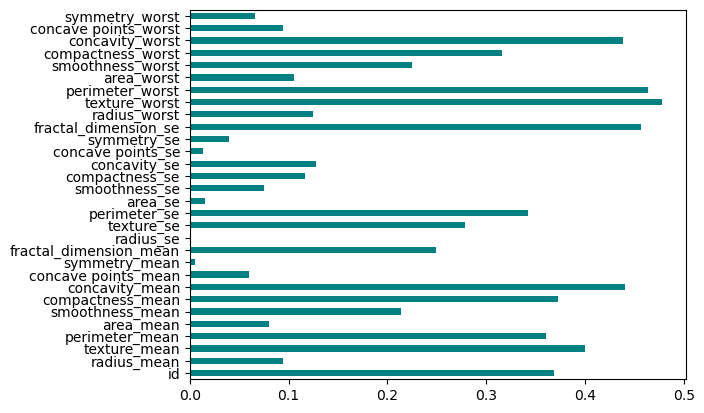

In [33]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X_df = pd.DataFrame(X, columns=dataset.columns[:X.shape[1]])

importances = mutual_info_classif(X_df, y)
feat_importances = pd.Series(importances, index=X_df.columns)
feat_importances.plot(kind='barh', color = 'teal')
plt.show()